# Lecture12: Introduction to Probability

>*[God] has afforded us only the twilight ... of Probability.* 
>
> -- John Locke

## How are probability and statistics different?

Before we start talking about probability theory, it's helpful to spend a moment thinking about the relationship between probability and statistics. The two disciplines are closely related but they're not identical. Probability theory is "the doctrine of chances". It's a branch of mathematics that tells you how often different kinds of events will happen. For example, all of these questions are things you can answer using probability theory:

- What are the chances of a fair coin coming up heads 10 times in a row?
- If I roll two six sided dice, how likely is it that I'll roll two sixes?
- How likely is it that five cards drawn from a perfectly shuffled deck will all be hearts?
- What are the chances that I'll win the lottery?



Notice that all of these questions have something in common. In each case the "truth of the world" is known, and my question relates to the "what kind of events" will happen. In the first question I *know* that the coin is fair, so there's a 50\% chance that any individual coin flip will come up heads. In the second question, I *know* that the chance of rolling a 6 on a single die is 1 in 6. In the third question I *know* that the deck is shuffled properly. And in the fourth question, I *know* that the lottery follows specific rules. You get the idea. The critical point is that probabilistic questions start with a known **_model_** of the world, and we use that model to do some calculations. The underlying model can be quite simple. For instance, in the coin flipping example, we can write down the model like this:

$$
P(\mbox{heads}) = 0.5
$$

which you can read as "the probability of heads is 0.5". As we'll see later, in the same way that percentages are numbers that range from 0\% to 100\%, probabilities are just numbers that range from 0 to 1. When using this probability model to answer the first question, I don't actually know exactly what's going to happen. Maybe I'll get 10 heads, like the question says. But maybe I'll get three heads. That's the key thing: in probability theory, the *model* is known, but the *data* are not.

So that's probability. What about statistics? Statistical questions work the other way around. In statistics, we *do not* know the truth about the world. All we have is the data, and it is from the data that we want to *learn* the truth about the world. Statistical questions tend to look more like these:

- If my friend flips a coin 10 times and gets 10 heads, are they playing a trick on me?
- If five cards off the top of the deck are all hearts, how likely is it that the deck was shuffled? 
- If the lottery commissioner's spouse wins the lottery, how likely is it that the lottery was rigged?



This time around, the only thing we have are data. What I *know* is that I saw my friend flip the coin 10 times and it came up heads every time. And what I want to **_infer_** is whether or not I should conclude that what I just saw was actually a fair coin being flipped 10 times in a row, or whether I should suspect that my friend is playing a trick on me. The data I have look like this:
```
H H H H H H H H H H H
```
and what I'm trying to do is work out which "model of the world" I should put my trust in. If the coin is fair, then the model I should adopt is one that says that the probability of heads is 0.5; that is, $P(\mbox{heads}) = 0.5$. If the coin is not fair, then I should conclude that the probability of heads is *not* 0.5, which we would write as $P(\mbox{heads}) \neq 0.5$. In other words, the statistical inference problem is to figure out which of these probability models is right. Clearly, the statistical question isn't the same as the probability question, but they're deeply connected to one another. Because of this, a good introduction to statistical theory will start with a discussion of what probability is and how it works.


## What does probability mean?

Let's start with the first of these questions. What is "probability"? It might seem surprising to you, but while statisticians and mathematicians (mostly) agree on what the *rules* of probability are, there's much less of a consensus on what the word really *means*. It seems weird because we're all very comfortable using words like "chance", "likely", "possible" and "probable", and it doesn't seem like it should be a very difficult question to answer. 

Let's suppose I want to bet on a soccer game between two teams of robots, *Arduino Arsenal* and *C Milan*. After thinking about it, I decide that there is an 80\% probability that *Arduino Arsenal* winning. What do I mean by that? Here are three possibilities...

- They're robot teams, so I can make them play over and over again, and if I did that, *Arduino Arsenal* would win 8 out of every 10 games on average.
- For any given game, I would only agree that betting on this game is only "fair" if a 1 dollar bet on *C Milan* gives a 5 dollar payoff (i.e. I get my 1 dollar back plus a 4 dollar reward for being correct), as would a 4 dollar bet on *Arduino Arsenal* (i.e., my 4 dollar bet plus a 1 dollar reward). 
- My subjective "belief" or "confidence" in an *Arduino Arsenal* victory is four times as strong as my belief in a *C Milan* victory.

Each of these seems sensible. However they're not identical, and not every statistician would endorse all of them. The reason is that there are different statistical ideologies and depending on which one you subscribe to, you might say that some of those statements are meaningless or irrelevant. In this section, I give a brief introduction the two main approaches that exist in the literature. These are by no means the only approaches, but they're the two big ones. 


### The frequentist view

The first of the two major approaches to probability, and the more dominant one in statistics, is referred to as the **_frequentist view_**, and it defines probability as a **_long-run frequency_**. Suppose we were to try flipping a fair coin, over and over again. By definition, this is a coin that has $P(H) = 0.5$. What might we observe? One possibility is that the first 20 flips might look like this:
```
T,H,H,H,H,T,T,H,H,H,H,T,H,H,T,T,T,T,T,H
```
In this case 11 of these 20 coin flips (55\%) came up heads. Now suppose that I'd been keeping a running tally of the number of heads (which I'll call $N_H$) that I've seen, across the first $N$ flips, and calculate the proportion of heads $N_H / N$ every time. Here's what I'd get (I did literally flip coins to produce this!):

In [1]:
import pandas as pd
number_of_flips = [1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10, 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 20]
number_of_heads = [0 , 1 , 2 , 3 , 4 , 4 , 4 , 5 , 6 , 7,  8  ,  8 ,  9 , 10 , 10 , 10 , 10 , 10 , 10 , 11] 
proportion = [.00 , .50 , .67 , .75 , .80 , .67 , .57 , .63 , .67 , .70, .73 , .67 , .69 , .71 , .67 ,  .63 , .59 , .56 , .53 , .55]

df = pd.DataFrame(
    {'Number_of_flips': number_of_flips,
     'Number_of_heads': number_of_heads,
     'Proportion': proportion
    })

df

,Number_of_flips,Number_of_heads,Proportion
0,1,0,0.00
1,2,1,0.50
2,3,2,0.67
3,4,3,0.75
4,5,4,0.80
5,6,4,0.67
6,7,4,0.57
7,8,5,0.63
8,9,6,0.67
9,10,7,0.70


Notice that at the start of the sequence, the *proportion* of heads fluctuates wildly, starting at .00 and rising as high as .80. Later on, one gets the impression that it dampens out a bit, with more and more of the values actually being pretty close to the "right" answer of .50. This is the frequentist definition of probability in a nutshell: flip a fair coin over and over again, and as $N$ grows large (approaches infinity, denoted $N\rightarrow \infty$), the proportion of heads will converge to 50\%. There are some subtle technicalities that the mathematicians care about, but qualitatively speaking, that's how the frequentists define probability. Unfortunately, we don't have an infinite number of coins, or the infinite patience required to flip a coin an infinite number of times. However, we do have a computer, and computers excel at mindless repetitive tasks. 

So we can ask the computer to simulate flipping a coin 1000 times, and then drew a picture of what happens to the proportion $N_H / N$ as $N$ increases. The results are shown in below. As you can see, the *proportion of observed heads* eventually stops fluctuating, and settles down; when it does, the number at which it finally settles is the true probability of heads.

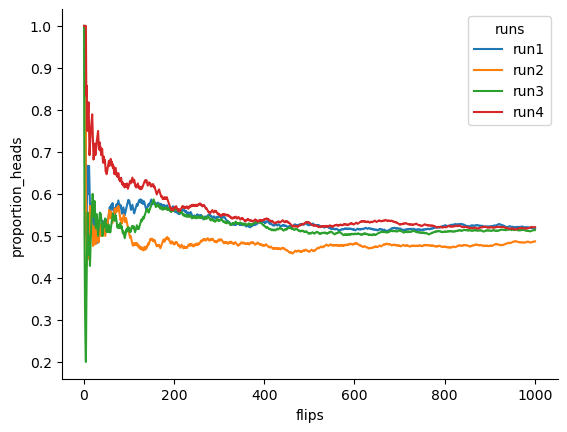

In [2]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



def coin_flips(n):
    n = n
    heads = [random.uniform(0,1) for i in range(n)]
    heads = [1 if i > 0.5 else 0 for i in heads]
    flips = np.arange(1,n+1)
    proportion = (np.cumsum(heads)/flips)

    df = pd.DataFrame(
        {'flips': flips,
         'proportion_heads': proportion
        })

    #ax = sns. lineplot(x=df['flips'], y=df['proportion_heads'])
    return(df)

n = 1000

run1 = coin_flips(n)
run2 = coin_flips(n)
run3 = coin_flips(n)
run4 = coin_flips(n)


df = pd.concat([run1, run2, run3, run4], axis=0)

runs = ['run1']*n + ['run2']*n + ['run3']*n + ['run4']*1000

df['runs'] = runs


ax = sns.lineplot(data = df, x = 'flips', y = 'proportion_heads', hue = 'runs')

sns.despine()


```

An illustration of how frequentist probability works. If you flip a fair coin over and over again, the proportion of heads that you’ve seen eventually settles down, and converges to the true probability of 0.5. Each line shows the result of one of four different simulated experiments: in each case, we pretend we flipped a coin 1000 times, and kept track of the proportion of flips that were heads as we went along. Although none of these sequences actually ended up with an exact value of .5, if we’d extended the experiment for an infinite number of coin flips they would have.
```



The frequentist definition of probability has some desirable characteristics. 

    Firstly, it is objective: the probability of an event is *necessarily* grounded in the world. The only way that probability statements can make sense is if they refer to (a sequence of) events that occur in the physical universe. [^note1] 
    
    Secondly, it is unambiguous: any two people watching the same sequence of events unfold, trying to calculate the probability of an event, must inevitably come up with the same answer. 
    
    However, it also has undesirable characteristics. Firstly, infinite sequences don't exist in the physical world. Suppose you picked up a coin from your pocket and started to flip it. Every time it lands, it impacts on the ground. Each impact wears the coin down a bit; eventually, the coin will be destroyed. 

So, one might ask whether it really makes sense to pretend that an "infinite" sequence of coin flips is even a meaningful concept, or an objective one. We can't say that an "infinite sequence" of events is a real thing in the physical universe, because the physical universe doesn't allow infinite anything.  More seriously, the frequentist definition has a narrow scope. There are lots of things out there that human beings are happy to assign probability to in everyday language, but cannot (even in theory) be mapped onto a hypothetical sequence of events. For instance, if a meteorologist comes on TV and says, "the probability of rain in Adelaide on 2 November 2048 is 60\%" we humans are happy to accept this. But it's not clear how to define this in frequentist terms. There's only one city of Adelaide, and only 2 November 2048. There's no infinite sequence of events here, just a once-off thing. Frequentist probability genuinely *forbids* us from making probability statements about a single event. From the frequentist perspective, it will either rain tomorrow or it will not; there is no "probability" that attaches to a single non-repeatable event. 


[^note1]: This doesn't mean that frequentists can't make hypothetical statements, of course; it's just that if you want to make a statement about probability, then it must be possible to redescribe that statement in terms of a sequence of potentially observable events, and the relative frequencies of different outcomes that appear within that sequence.

### The Bayesian view

The **_Bayesian view_** of probability is often called the subjectivist view, and it is a minority view among statisticians, but one that has been steadily gaining traction for the last several decades. There are many flavours of Bayesianism, making hard to say exactly what "the" Bayesian view is. The most common way of thinking about subjective probability is to define the probability of an event as the **_degree of belief_** that an intelligent and rational agent assigns to that truth of that event. From that perspective, probabilities don't exist in the world, but rather in the thoughts and assumptions of people and other intelligent beings.

However, in order for this approach to work, we need some way of operationalising "degree of belief". One way that you can do this is to formalise it in terms of "rational gambling", though there are many other ways. Suppose that I believe that there's a 60\% probability of rain tomorrow. If someone offers me a bet: if it rains tomorrow, then I win 5 dollars, but if it doesn't rain then I lose 5 dollars. Clearly, from my perspective, this is a pretty good bet. On the other hand, if I think that the probability of rain is only 40\%, then it's a bad bet to take. Thus, we can operationalise the notion of a "subjective probability" in terms of what bets I'm willing to accept. 

What are the advantages and disadvantages to the Bayesian approach? The main advantage is that it allows you to assign probabilities to any event you want to. You don't need to be limited to those events that are repeatable. The main disadvantage (to many people) is that we can't be purely objective -- specifying a probability requires us to specify an entity that has the relevant degree of belief. This entity might be a human, an alien, a robot, or even a statistician, but there has to be an intelligent agent out there that believes in things. To many people this is uncomfortable: it seems to make probability arbitrary. While the Bayesian approach does require that the agent in question be rational (i.e., obey the rules of probability), it does allow everyone to have their own beliefs; I can believe the coin is fair and you don't have to, even though we're both rational. The frequentist view doesn't allow any two observers to attribute different probabilities to the same event: when that happens, then at least one of them must be wrong. The Bayesian view does not prevent this from occurring. Two observers with different background knowledge can legitimately hold different beliefs about the same event. In short, where the frequentist view is sometimes considered to be too narrow (forbids lots of things that that we want to assign probabilities to), the Bayesian view is sometimes thought to be too broad (allows too many differences between observers). 


### What's the difference? And who is right?

Now that you've seen each of these two views independently, it's useful to make sure you can compare the two. Go back to the hypothetical robot soccer game at the start of the section. 
        
        What do you think a frequentist and a Bayesian would say about these three statements? 
        Which statement would a frequentist say is the correct definition of probability? 
        Which one would a Bayesian do? 
        Would some of these statements be meaningless to a frequentist or a Bayesian? If you've understood the two perspectives, you should have some sense of how to answer those questions.




## Basic probability theory

Ideological arguments between Bayesians and frequentists notwithstanding, it turns out that people mostly agree on the rules that probabilities should obey. There are lots of different ways of arriving at these rules. The most commonly used approach is based on the work of Andrey Kolmogorov, one of the great Soviet mathematicians of the 20th century. 

### Introducing probability distributions

For example, John only owns 5 pairs of pants: three pairs of jeans, the bottom half of a suit, and a pair of tracksuit pants. And he has given them names:  $X_1$, $X_2$, $X_3$, $X_4$ and $X_5$. Now, on any given day, he picks out exactly one of pair of pants to wear. 

If John were to describe this situation using the language of probability theory, he would refer to each pair of pants (i.e., each $X$) as an **_elementary event_**. The key characteristic of elementary events is that every time we make an observation (e.g., every time he puts on a pair of pants), then the outcome will be one and only one of these events. Similarly, the set of all possible events is called a **_sample space_**.   

Now that we have a sample space, which is built from lots of possible elementary events (pants), what we want to do is assign a **_probability_** of one of these elementary events. For an event $X$, the probability of that event $P(X)$ is a number that lies between 0 and 1. The bigger the value of $P(X)$, the more likely the event is to occur. So, for example, if $P(X) = 0$, it means the event $X$ is impossible (i.e., he never wears those pants). On the other hand, if $P(X) = 1$ it means that event $X$ is certain to occur (i.e., John always wears those pants). For probability values in the middle, it means that John sometimes wears those pants. For instance, if $P(X) = 0.5$ it means that he wears those pants half of the time. 

The last thing we need to recognise is that "something always happens". What this somewhat trite statement means, in probabilistic terms, is that the probabilities of the elementary events need to add up to 1. This is known as the **_law of total probability_**, not that any of us really care. More importantly, if these requirements are satisfied, then what we have is a **_probability distribution_**. For example, this is an example of a probability distribution

|Which pants |Blue jeans    |Grey jeans    |Black jeans   |Black suit   |Blue tracksuit |
|:-----------|:-------------|:-------------|:-------------|:------------|:--------------|
|Label       |$X_1$         |$X_2$         |$X_3$         |$X_4$        |$X_5$          |
|Probability |$P(X_1) = .5$ |$P(X_2) = .3$ |$P(X_3) = .1$ |$P(X_4) = 0$ |$P(X_5) = .1$  |

Each of the events has a probability that lies between 0 and 1, and if we add up the probability of all events, they sum to 1. Awesome. We can even draw a nice bar graph to visualise this distribution.

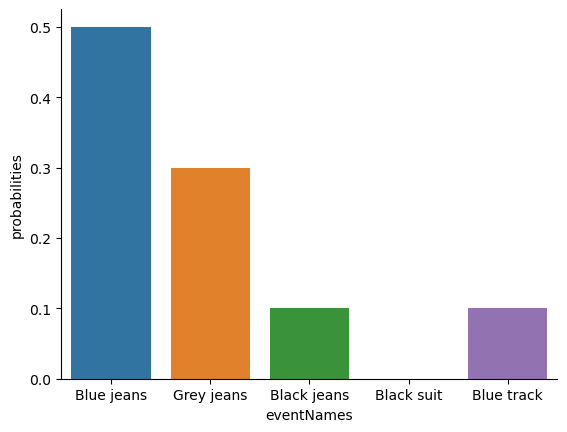

In [3]:

import pandas as pd
import seaborn as sns

df = pd.DataFrame(
    {'probabilities': [.5, .3, .1, 0, .1],
     'eventNames': ["Blue jeans", "Grey jeans", "Black jeans", "Black suit", "Blue track"],
    }) 

fig = sns.barplot(x='eventNames', y='probabilities', data=df)

sns.despine()

```

A visual depiction of the “pants” probability distribution. There are five “elementary events”, corresponding to the five pairs of pants that I own. Each event has some probability of occurring: this probability is a number between 0 to 1. The sum of these probabilities is 1.
```



Probability theory allows you to talk about **_non elementary events_** as well as elementary ones. In the pants example, it's perfectly legitimate to refer to the probability that John weard jeans. In this scenario, the "John wears jeans" event said to have happened as long as the elementary event that actually did occur is one of the appropriate ones; in this case "blue jeans", "black jeans" or "grey jeans". In mathematical terms, we defined the "jeans" event $E$ to correspond to the set of elementary events $(X_1, X_2, X_3)$. If any of these elementary events occurs, then $E$ is also said to have occurred. Having decided to write down the definition of the $E$ this way, it's pretty straightforward to state what the probability $P(E)$ is: we just add everything up. In this particular case

$$
P(E) = P(X_1) + P(X_2) + P(X_3)
$$ 

and, since the probabilities of blue, grey and black jeans respectively are .5, .3 and .1, the probability that I wear jeans is equal to .9. 



|English     |Notation      |Formula                     |
|:-----------|:------------ |:---------------------------|
|Not $A$     |$P(\neg A)$   |$1-P(A)$                    |
|$A$ or $B$  |$P(A \cup B)$ |$P(A) + P(B) - P(A \cap B)$ |
|$A$ and $B$ |$P(A \cap B)$ |$P(A|B) P(B)$               |


## The binomial distribution
As you might imagine, probability distributions vary enormously, and there's an enormous range of distributions out there.

Five distributions: the binomial distribution, the normal distribution, the $t$ distribution, the $\chi^2$ ("chi-square") distribution and the $F$ distribution. 

### Introducing the binomial

The theory of probability originated in the attempt to describe how games of chance work, so it seems fitting that our discussion of the **_binomial distribution_** should involve a discussion of rolling dice and flipping coins. 

Let's imagine a simple "experiment": I'm holding 20 identical six-sided dice. On one face of each die there's a picture of a skull; the other five faces are all blank. If I proceed to roll all 20 dice, what's the probability that I'll get exactly 4 skulls? Assuming that the dice are fair, we know that the chance of any one die coming up skulls is 1 in 6; to say this another way, the skull probability for a single die is approximately $0.167$. This is enough information to answer our question, so let's have a look at how it's done. 

We'll let $N$ denote the number of dice rolls in our experiment; which is often referred to as the **_size parameter_** of our binomial distribution. We'll also use $\theta$ to refer to the the probability that a single die comes up skulls, a quantity that is usually called the **_success probability_** of the binomial. Note that the term "success" is pretty arbitrary, and doesn't actually imply that the outcome is something to be desired. If $\theta$ referred to the probability that any one passenger gets injured in a bus crash, we'd still call it the success probability. Finally, we'll use $X$ to refer to the results of our experiment, namely the number of skulls I get when I roll the dice. Since the actual value of $X$ is due to chance, we refer to it as a **_random variable_**. The quantity that we want to calculate is the probability that $X = 4$ given that we know that $\theta = .167$ and $N=20$. The general "form" of the thing I'm interested in calculating could be written as 

$$
P(X \ | \ \theta, N)
$$

and we're interested in the special case where $X=4$, $\theta = .167$ and $N=20$. 
There's only one more piece of notation I want to refer to before moving on to discuss the solution to the problem. If I want to say that $X$ is generated randomly from a binomial distribution with parameters $\theta$ and $N$, the notation I would use is as follows:

$$
X \sim \mbox{Binomial}(\theta, N)
$$ 





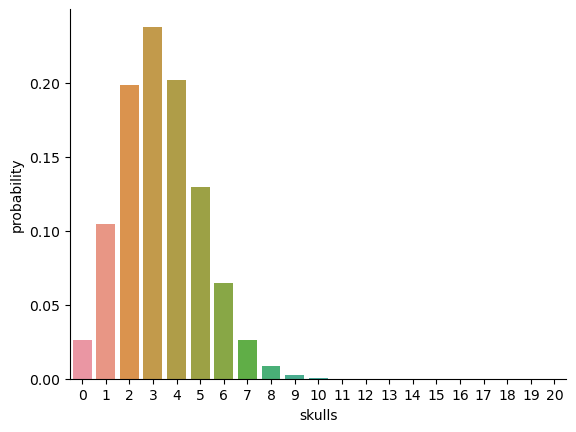

In [4]:
import pandas as pd
import seaborn as sns
from scipy.stats import binom

N = 20
r = list(range(0,21,1))
p = 1/6

y = binom.pmf(r,N,p)

df = pd.DataFrame(
    {'probability': y,
     'skulls': np.arange(0,21,1),
    }) 

fig = sns.barplot(x='skulls', y='probability', data=df)

sns.despine()

```

The binomial distribution with size parameter of N = 20 and an underlying success probability of θ = 1/6. Each vertical bar depicts the probability of one specific outcome (i.e., one possible value of X). Because this is a probability distribution, each of the probabilities must be a number between 0 and 1, and the heights of the bars must sum to 1 as well.
```



By the way, although it appears from the figure that it is impossible to roll more than 10 skulls in one throw of 20 dice, we intuitively know this can't be right. Surely it is _possible_, although unlikely, to roll e.g. 20 sixes in one throw of 20 dice. Indeed, it is possible, just so unlikely that the probability is too small to represent with even a single pixel in our figure, so it appears to be zero.

Below, you can see the formulas for the binomial and normal distributions.




The formula for the binomial distribution looks like this:

$$
P(X | \theta, N) = \frac{N!}{X! (N-X)!}  \theta^X (1-\theta)^{N-X}
$$ 



and the formula for the normal distribution looks like this:

$$
p(X | \mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma} \exp \left( -\frac{(X - \mu)^2}{2\sigma^2} \right)
$$

### Working with the binomial distribution in Python


Although some people find it handy to know the above formulas, most people just want to know how to use the distributions without worrying too much about the maths. To that end, the `scipy` module has a method called `binom.pmf` that calculates binomial probabilities for us. The arguments to the function are 

- `k`. The number of success you are interested in.
- `n`. The number of attempts
- `p`. This is the success probability for any one trial in the experiment.

So, in order to calculate the probability of getting `k = 4` skulls, from an experiment of `n = 20` trials, in which the probability of getting a skull on any one trial is `p = 1/6` ... well, the command I would use is simply this:



In [5]:
from scipy.stats import binom
p = binom.pmf(k=4, n=20, p=1/6)
print('The probability of rolling 4 skulls with 20 dice is', p)

The probability of rolling 4 skulls with 20 dice is 0.20220358121717238


To give you a feel for how the binomial distribution changes when we alter the values of $\theta$ and $N$, let's suppose that instead of rolling dice, I'm actually flipping coins. 

This time around, my experiment involves flipping a fair coin repeatedly, and the outcome that I'm interested in is the number of heads that I observe. In this scenario, the success probability is now $\theta = 1/2$. 

Suppose I were to flip the coin $N=20$ times. In this example, I've changed the success probability, but kept the size of the experiment the same. What does this do to our binomial distribution? The main effect of this is to shift the whole distribution, as you'd expect. What if we flipped a coin $N=100$ times? In that case, the distribution stays roughly in the middle, but there's a bit more variability in the possible outcomes. 

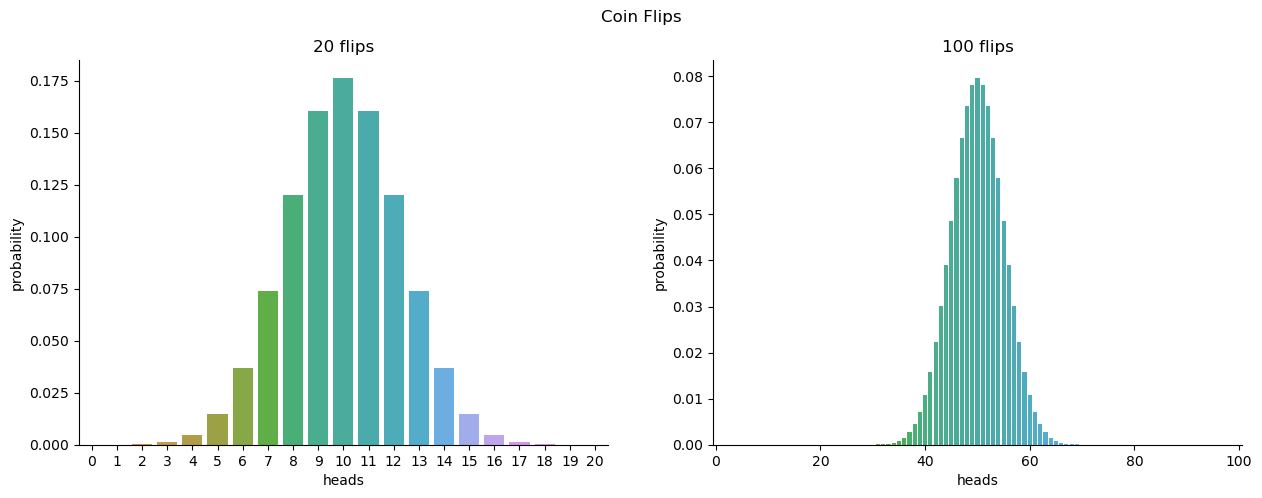

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt


from scipy.stats import binom

step = 1

n1 = 20
n2 = 100

r1 = list(range(0,21,step))
r2 = list(range(0,101,step))

p1 = 1/2
p2 = 1/2

y1 = binom.pmf(r1,n1,p1)
y2 = binom.pmf(r2,n2,p2)

df1 = pd.DataFrame(
    {'probability': y1,
     'heads': r1,
    }) 


df2 = pd.DataFrame(
    {'probability': y2,
     'heads': r2,
    }) 



fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Coin Flips')


axes[0].set_title('20 flips')
axes[1].set_title('100 flips')

ax1 = sns.barplot(x='heads', y='probability', data=df1, ax=axes[0])
ax2 = sns.barplot(x='heads', y='probability', data=df2, ax=axes[1])

ax2.set_xticks([0, 20, 40, 60,80, 100])

sns.despine()

```

The binomial distribution with size parameter of N = 20 and an underlying success probability of θ = 1/2. Compare these plots to those in {numref}`fig-skulls`, which also had a size parameter of N = 20 and an underlying success probability of θ = 1/6.
```

## The normal distribution

While the binomial distribution is conceptually the simplest distribution to understand, it's not the most important one. That particular honour goes to the **_normal distribution_**, which is also referred to as "the bell curve" or a "Gaussian distribution". A normal distribution is described using two parameters, the mean of the distribution $\mu$ and the standard deviation of the distribution $\sigma$. The notation that we sometimes use to say that a variable $X$ is normally distributed is as follows:

$$
X \sim \mbox{Normal}(\mu,\sigma)
$$


Instead of focusing on the maths, let's try to get a sense for what it means for a variable to be normally distributed. 

To that end, have a look at the following graph, which plots a normal distribution with mean $\mu = 0$ and standard deviation $\sigma = 1$. You can see where the name "bell curve" comes from: it looks a bit like a bell. 

Notice that, unlike the plots to illustrate the binomial distribution, the picture of the normal distribution shows a smooth curve instead of "histogram-like" bars. 

This isn't an arbitrary choice: the normal distribution is continuous, whereas the binomial is discrete. For instance, in the die rolling example from the last section, it was possible to get 3 skulls or 4 skulls, but impossible to get 3.9 skulls. The figures reflected this fact, with a bar located at $X=3$ and another one at $X=4$, but there's nothing in between. 

Continuous quantities don't have this constraint. For instance, suppose we're talking about the weather. The temperature on a pleasant Spring day could be 23 degrees, 24 degrees, 23.9 degrees, or anything in between since temperature is a continuous variable, and so a normal distribution might be quite appropriate for describing Spring temperatures. In fact, the normal distribution is so handy that people tend to use it even when the variable isn't actually continuous. As long as there are enough categories (e.g., Likert scale responses to a questionnaire), it's pretty standard practice to use the normal distribution as an approximation. 

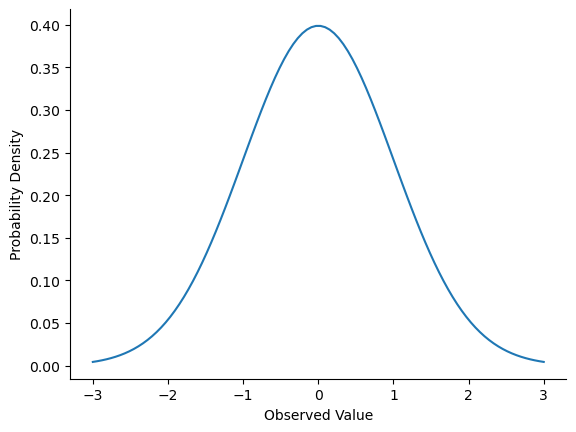

In [7]:
import numpy as np
import scipy.stats as stats
import seaborn as sns

mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

fig = sns.lineplot(x = x, y = stats.norm.pdf(x, mu, sigma))
plt.xlabel('Observed Value')
plt.ylabel('Probability Density')

sns.despine()


 ```

The normal distribution with mean $mu = 0$ and standard deviation $sigma = 1$. The $x$-axis corresponds to the value of some variable, and the $y$-axis tells us something about how likely we are to observe that value. However, notice that the $y$-axis is labelled "Probability Density" and not "Probability". There is a subtle and somewhat frustrating characteristic of continuous distributions that makes the $y$ axis behave a bit oddly: the height of the curve here isn't actually the probability of observing a particular $x$ value. On the other hand, it *is* true that the heights of the curve tells you which $x$ values are more likely (the higher ones!).
```

With this in mind, let's see if we can't get an intuition for how the normal distribution works. Firstly, let's have a look at what happens when we play around with the parameters of the distribution. The following graph plots normal distributions that have different means, but have the same standard deviation. As you might expect, all of these distributions have the same "width". The only difference between them is that they've been shifted to the left or to the right. In every other respect they're identical. 

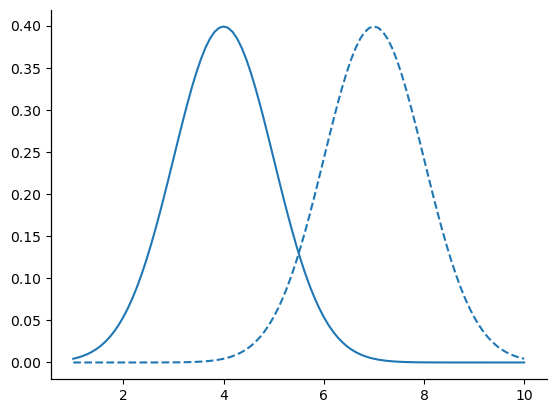

In [8]:

import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns


mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(1, 10, 100)
y1 = stats.norm.pdf(x, 4, sigma)
y2 = stats.norm.pdf(x, 7, sigma)


fig = sns.lineplot(x = x, y = y1)
ax2=fig.twinx()
ax2.tick_params(left=False, labelleft=False, top=False, labeltop=False,
                   right=False, labelright=False, bottom=False, labelbottom=False)



sns.lineplot(x = x, y = y2, ax=ax2, linestyle='--')
sns.despine()


 ```
An illustration of what happens when you change the mean of a normal distribution. The solid line depicts a normal distribution with a mean of $mu=4$. The dashed line shows a normal distribution with a mean of $mu=7$. In both cases, the standard deviation is $sigma=1$. Not surprisingly, the two distributions have the same shape, but the dashed line is shifted to the right.

```

In contrast, if we increase the standard deviation while keeping the mean constant, the peak of the distribution stays in the same place, but the distribution gets wider, as you can see in the above grpah. Notice, though, that when we widen the distribution, the height of the peak shrinks. This has to happen: in the same way that the heights of the bars that we used to draw a discrete binomial distribution have to *sum* to 1, the total *area under the curve* for the normal distribution must equal 1. 

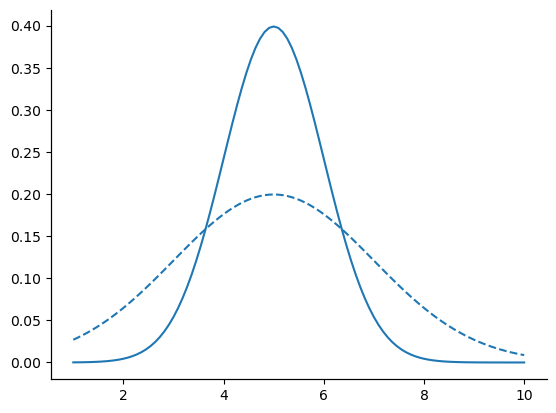

In [9]:

import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns


mu = 5

variance = 1
sigma = np.sqrt(variance)
x = np.linspace(1, 10, 100)
y1 = stats.norm.pdf(x, mu, 1)

variance = 2
sigma = np.sqrt(variance)
y2 = stats.norm.pdf(x, mu, 2)


fig = sns.lineplot(x = x, y = y1)

ax2=fig.twiny()
ax2.tick_params(left=False, labelleft=False, top=False, labeltop=False,
                   right=False, labelright=False, bottom=False, labelbottom=False)



sns.lineplot(x = x, y = y2, ax=ax2, linestyle='--')
sns.despine()



 ```
An illustration of what happens when you change the the standard deviation of a normal distribution. Both distributions plotted in this figure have a mean of μ “ 5, but they have different standard deviations. The solid line plots a distribution with standard deviation σ “ 1, and the dashed line shows a distribution with standard deviation σ “ 2. As a consequence, both distributions are “centred” on the same spot, but the dashed line is wider than the solid one.
```


Irrespective of what the actual mean and standard deviation are, 68.3\% of the area falls within 1 standard deviation of the mean. Similarly, 95.4\% of the distribution falls within 2 standard deviations of the mean, and 99.7\% of the distribution is within 3 standard deviations.

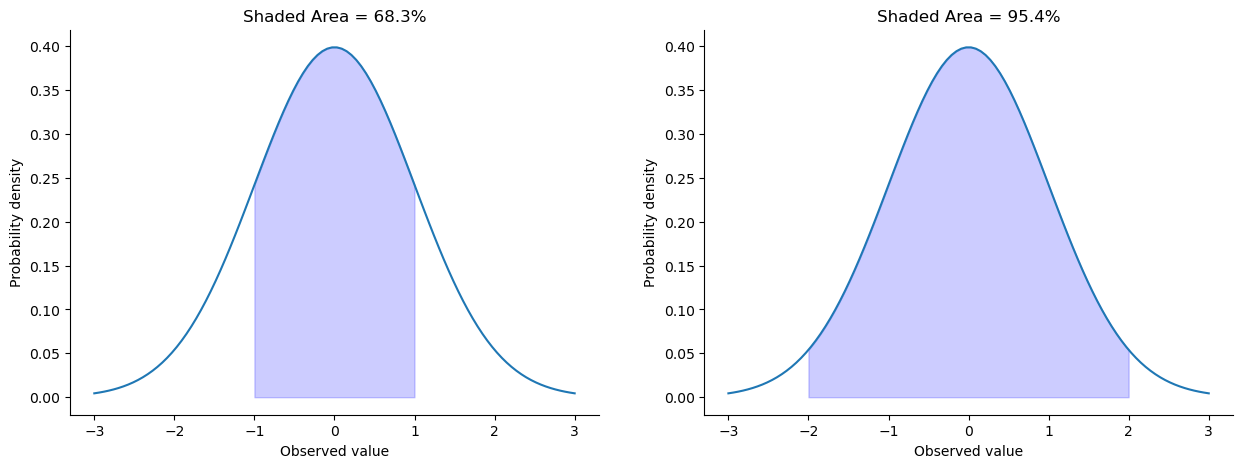

In [10]:

import numpy as np
import scipy.stats as stats
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
sns.lineplot(x = x, y = stats.norm.pdf(x, mu, sigma), ax=axes[0])


sns.lineplot(x = x, y = stats.norm.pdf(x, mu, sigma), ax=axes[1])


x_fill1 = np.arange(-1, 1, 0.001)
x_fill2 = np.arange(-2, 2, 0.001)

y_fill1 = stats.norm.pdf(x_fill1,0,1)
y_fill2 = stats.norm.pdf(x_fill2,0,1)

axes[0].fill_between(x_fill1,y_fill1,0, alpha=0.2, color='blue')
axes[1].fill_between(x_fill2,y_fill2,0, alpha=0.2, color='blue')

axes[0].set_title("Shaded Area = 68.3%")
axes[1].set_title("Shaded Area = 95.4%")

axes[0].set(xlabel='Observed value', ylabel='Probability density')
axes[1].set(xlabel='Observed value', ylabel='Probability density')

sns.despine()


 ```
The area under the curve tells you the probability that an observation falls within a particular range. The solid lines plot normal distributions with mean $mu=0$ and standard deviation $sigma=1$ The shaded areas illustrate \"areas under the curve\" for two important cases. On the left, we can see that there is a 68.3% chance that an observation will fall within one standard deviation of the mean. On the right, we see that there is a 95.4% chance that an observation will fall within two standard deviations of the mean.
```


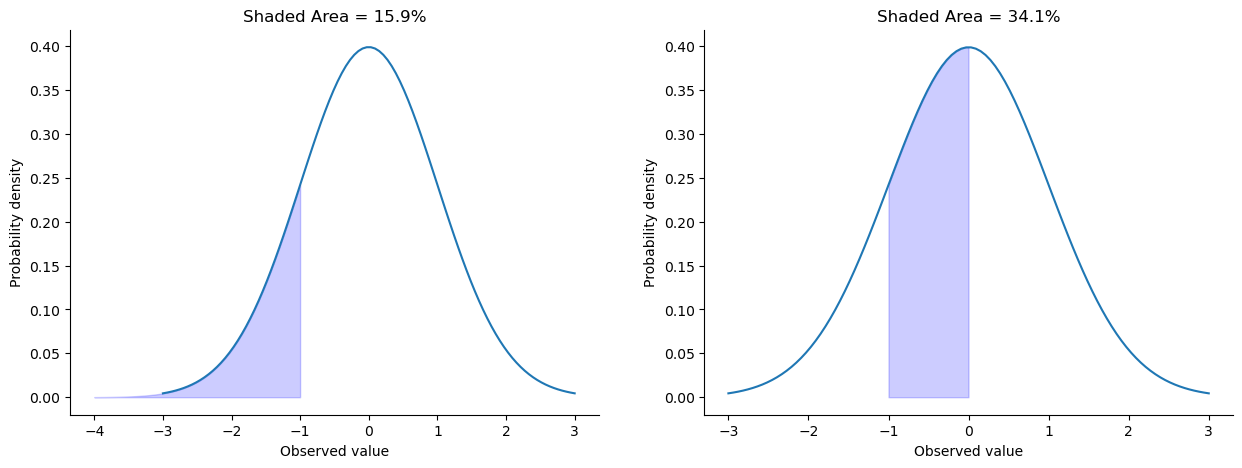

In [11]:

import numpy as np
import scipy.stats as stats
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
sns.lineplot(x = x, y = stats.norm.pdf(x, mu, sigma), ax=axes[0])


sns.lineplot(x = x, y = stats.norm.pdf(x, mu, sigma), ax=axes[1])


x_fill1 = np.arange(-4, -1, 0.001)
x_fill2 = np.arange(-1, 0, 0.001)

y_fill1 = stats.norm.pdf(x_fill1,0,1)
y_fill2 = stats.norm.pdf(x_fill2,0,1)

axes[0].fill_between(x_fill1,y_fill1,0, alpha=0.2, color='blue')
axes[1].fill_between(x_fill2,y_fill2,0, alpha=0.2, color='blue')

axes[0].set_title("Shaded Area = 15.9%")
axes[1].set_title("Shaded Area = 34.1%")

axes[0].set(xlabel='Observed value', ylabel='Probability density')
axes[1].set(xlabel='Observed value', ylabel='Probability density')

sns.despine()


 ```
Two more examples of the \"area under the curve idea\". There is a 15.9% chance that an observation is one standard deviation below the mean or smaller (left), and a 34.1% chance that the observation is greater than one standard deviation below the mean but still below the mean (right). Notice that if you add these two numbers together you get 15.9% + 34.1% = 50%. For normally distributed data, there is a 50% chance that an observation falls below the mean. And of course that also implies that there is a 50% chance that it falls above the mean.
```



In [12]:

stats.norm.pdf(1,1,0.1)


3.989422804014327

## Other useful distributions

The normal distribution is the distribution that statistics makes most use of (for reasons to be discussed shortly), and the binomial distribution is a very useful one for lots of purposes. But the world of statistics is filled with probability distributions, some of which we'll run into in passing. In particular, the three other distributions are the $t$ distribution, the $\chi^2$ distribution and the $F$ distribution. 

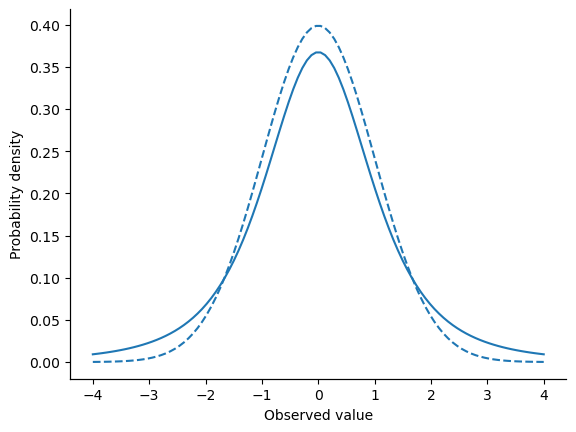

In [13]:

import numpy as np
import scipy.stats as stats
import seaborn as sns


mu = 0
variance = 1
sigma = np.sqrt(variance)
degfree = 3
x = np.linspace(-4, 4, 100)

y1 = stats.norm.pdf(x, mu, sigma)

y2 = stats.t.pdf(x, degfree)


fig = sns.lineplot(x = x, y = y1, linestyle='--')
ax2 = fig.twiny()
ax2.tick_params(left=False, labelleft=False, top=False, labeltop=False,
                   right=False, labelright=False, bottom=False, labelbottom=False)

sns.lineplot(x = x, y = y2, ax=ax2)
fig.set(xlabel='Observed value', ylabel='Probability density')

sns.despine()


 
- A $t$ distribution with 3 degrees of freedom (solid line). It looks similar to a normal distribution, but it's not quite the same. For comparison purposes, I've plotted a standard normal distribution as the dashed line. Note that the \"tails\" of the $t$ distribution are \"heavier\" (i.e., extend further outwards) than the tails of the normal distribution? That's the important difference between the two.




- The **_$\chi^2$ distribution_** is another distribution that turns up in lots of different places. The situation in which we'll see it is when doing [categorical data analysis](chisquare).

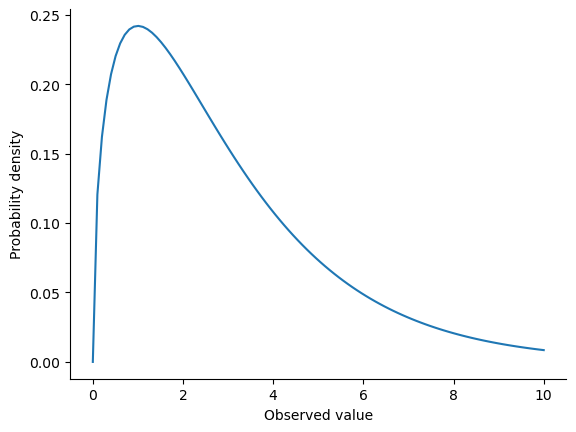

In [14]:

import numpy as np
import scipy.stats as stats
import seaborn as sns


degfree = 3
x = np.linspace(0, 10, 100)

y = stats.chi2.pdf(x, degfree)

fig = sns.lineplot(x = x, y = y)
fig.set(xlabel='Observed value', ylabel='Probability density')

sns.despine()



A $chi^2$ distribution with 3 degrees of freedom. Notice that the observed values must always be greater than zero, and that the distribution is pretty skewed. These are the key features of a chi-square distribution.



- The **_$F$ distribution_** looks a bit like a $\chi^2$ distribution, and it arises whenever you need to compare two $\chi^2$ distributions to one another. If you want to compare two different "sums of squares", you're probably talking about something that has an $F$ distribution. 

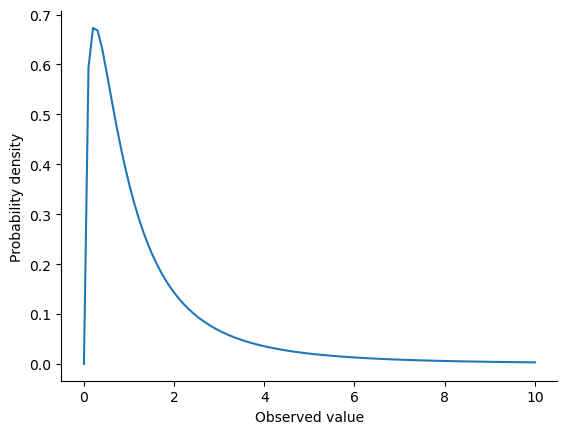

In [15]:

import numpy as np
import scipy.stats as stats
import seaborn as sns


degfree1 = 3
degfree2 = 5
x = np.linspace(0, 10, 100)

y = stats.f.pdf(x, degfree1, degfree2)


fig = sns.lineplot(x = x, y = y)
fig.set(xlabel='Observed value', ylabel='Probability density')

sns.despine()



An $F$ distribution with 3 and 5 degrees of freedom. Qualitatively speaking, it looks pretty similar to a chi-square distribution, but they're not quite the same in general.


Because these distributions are all tightly related to the normal distribution and to each other, and because they are will turn out to be the important distributions when doing inferential statistics. 

First, we'll use the `random.normal()` function to generate 1000 normally-distributed observations: 

In [16]:
import numpy as np

mu = 0 
sigma = 1
n = 1000
dist = np.random.normal(mu, sigma, n)

# inspect the first 10 samples
print(dist[0:10])

[-0.24824338  0.03717763 -0.97728635 -0.20173754 -0.97043966  1.39558576
 -0.00739102  0.24040986 -2.12613582 -0.09715845]


So the `dist` variable contains 1000 numbers that are normally distributed, and have mean 0 and standard deviation 1, and the actual print out of these numbers goes on for rather a long time. Next, what we can do is use the `histplot()` function from `seaborn` to draw a histogram of the data, like so:

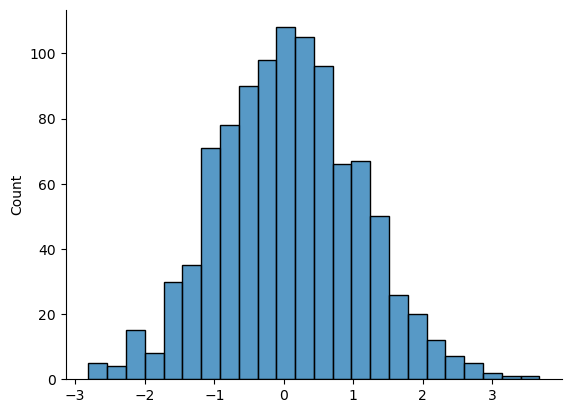

In [17]:
import seaborn as sns

sns.histplot(dist)

sns.despine()

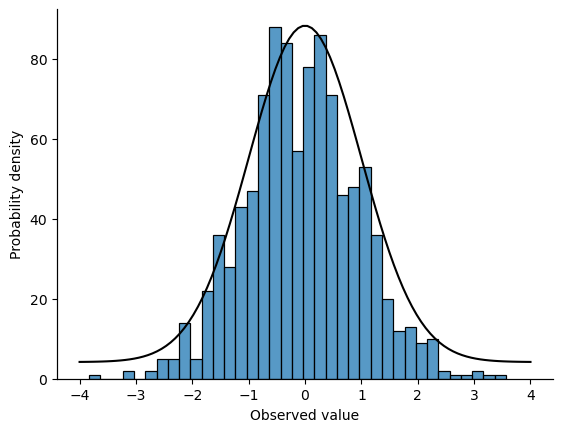

In [18]:
import numpy as np
import seaborn as sns
from scipy import stats

x = np.linspace(-4,4,100)

mu = 0 
sigma = 1
n = 1000
dist = np.random.normal(mu, sigma, n)

y = stats.norm.pdf(x, mu, sigma)

fig = sns.histplot(dist, binwidth=0.2)
ax2 = fig.twinx()
ax2.tick_params(left=False, labelleft=False, top=False, labeltop=False,
                   right=False, labelright=False, bottom=False, labelbottom=False)

fig.set(xlabel='Observed value', ylabel='Probability density')

sns.lineplot(x=x,y=y, ax=ax2, color='black')

sns.despine()

In the previous example all I did was to generate lots of normally distributed observations using `random.normal()` and then compare those to the true probability distribution in the figure (using `stats.norm.pdf()` to generate the black line in the figure. 

Now let's try something trickier. We'll try to generate some observations that follow a chi-square distribution with 3 degrees of freedom, but instead of using `stats.chi2.pdf()`, we'll start with variables that are normally distributed, and see if we can exploit the known relationships between normal and chi-square distributions to do the work. As mentioned earlier, a chi-square distribution with $k$ degrees of freedom is what you get when you take $k$ normally-distributed variables (with mean 0 and standard deviation 1), square them, and add them up. Since we want a chi-square distribution with 3 degrees of freedom, we'll need to create three sets of normally-distributed data. Let's call them `normal_a`, `normal_b`, and `normal_c`.

Of course, you can give variables any name you want, and we could just as well call these Larry, Moe, and Curly, or Huey, Dewey, and Louie, but in programming, the most boringly obvious names are usually the best ones. When writing code, we are looking for clarity, not dramatic effect!

In [19]:
import numpy as np

normal_a = np.random.normal(0, 1, 1000) # a set of normally-distributed data
normal_b = np.random.normal(0, 1, 1000) # another set of normally-distributed data
normal_c = np.random.normal(0, 1, 1000) # and another!

Now that we've done that, the theory says we should square these and add them together, like this

In [20]:
chi_square_data = np.square(normal_a) + np.square(normal_b) + np.square(normal_c)

and the resulting `chi_square_data` variable should contain 1000 observations that follow a chi-square distribution with 3 degrees of freedom. You can use the `sns.histplot()` function to have a look at these observations yourself, using a command like this,

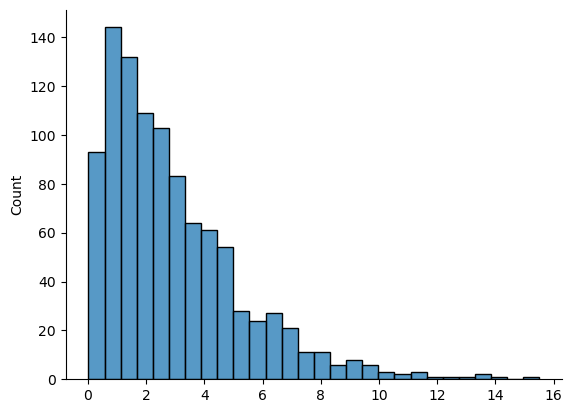

In [21]:
import seaborn as sns

sns.histplot(chi_square_data)

sns.despine()

and you should obtain a result that looks pretty similar to the chi-square plot. Once again, with a bit more code, we can plot the actual chi-square distribution with 3 degrees of freedom over our histogram generated from random samples and compare:

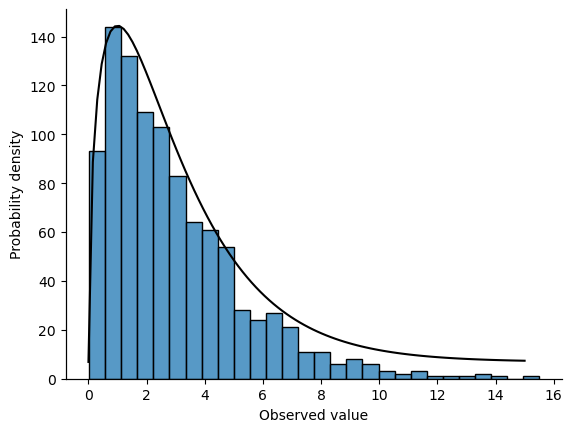

In [23]:
import numpy as np
import seaborn as sns
from scipy import stats

x = np.linspace(0, 15, 100)
y = stats.chi2.pdf(x, 3)

fig = sns.histplot(chi_square_data)
ax2 = fig.twinx()

fig.set(xlabel='Observed value', ylabel='Probability density')

sns.lineplot(x=x, y=y, ax=ax2, color='black')

ax2.tick_params(left=False, labelleft=False, top=False, labeltop=False,
                   right=False, labelright=False, bottom=False, labelbottom=False)

sns.despine()


It's pretty clear that -- even though I used `random.norm()` to do all the work rather than `stats.chi2.pdf` -- the observations stored in the `chi_square_data` variable really do follow a chi-square distribution. 

We can extend this demonstration to the $t$ distribution and the $F$ distribution. Earlier, I implied that the $t$ distribution is related to the normal distribution when the standard deviation is unknown. That's certainly true, but there's a somewhat more precise relationship between the normal, chi-square and $t$ distributions. Suppose we "scale" our chi-square data by dividing it by the degrees of freedom, like so:

In [24]:
scaled_chi_square_data = chi_square_data / 3

We then take a set of normally distributed variables and divide them by (the square root of) our scaled chi-square variable which had $df=3$, and the result is a $t$ distribution with 3 degrees of freedom. If we plot the histogram of `t_3`, we end up with something that looks very similar to the t distribution.

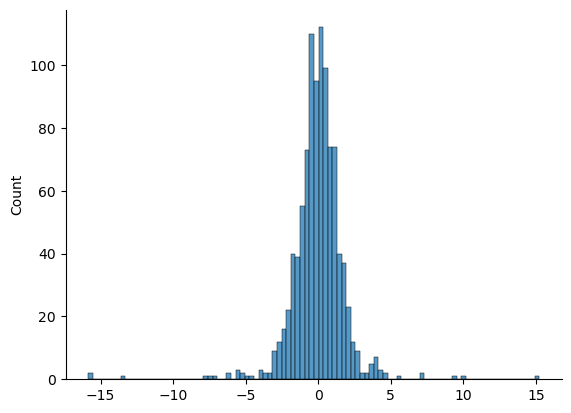

In [25]:
normal_d = np.random.normal(0, 1, 1000) # yet another set of normally distributed data
t_3 = normal_d / np.sqrt(scaled_chi_square_data) # divide by square root of scaled chi-square to get t

sns.histplot(t_3)

sns.despine()

Adding the usual formatting plus the true t-distribution with three degrees of freedom, we get something like this:

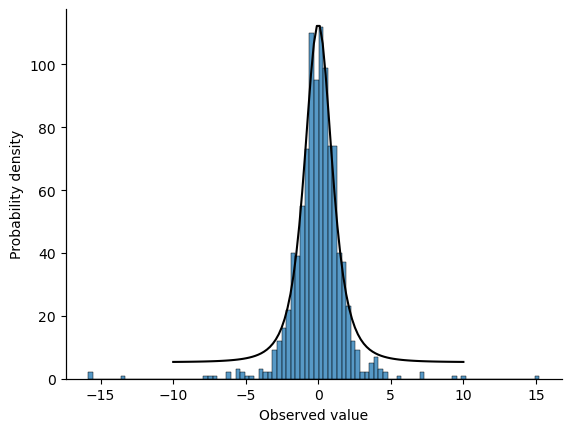

In [26]:
import numpy as np
import seaborn as sns
from scipy import stats

x = np.linspace(-10, 10, 100)
y = stats.t.pdf(x, 3)

fig = sns.histplot(t_3)
ax2 = fig.twinx()

fig.set(xlabel='Observed value', ylabel='Probability density')

sns.lineplot(x=x, y=y, ax=ax2, color='black')

ax2.tick_params(left=False, labelleft=False, top=False, labeltop=False,
                   right=False, labelright=False, bottom=False, labelbottom=False)

sns.despine()

Similarly, we can obtain an $F$ distribution by taking the ratio between two scaled chi-square distributions. Suppose, for instance, we wanted to generate data from an $F$ distribution with 3 and 20 degrees of freedom. We could do this using `numpy.random.f()`, but we could also do the same thing by generating two chi-square variables, one with 3 degrees of freedom, and the other with 20 degrees of freedom. As the example with `chi_square_data` illustrates, we can actually do this using `numpy.random.normal()`.

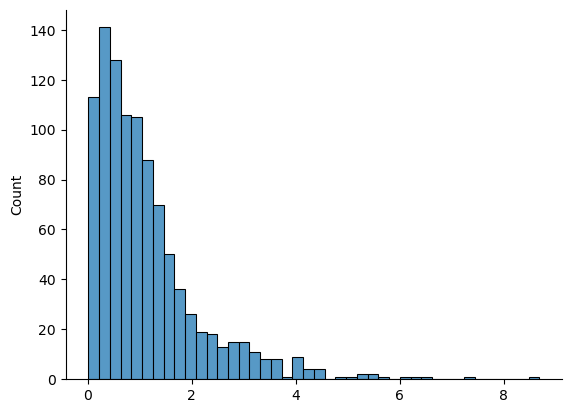

In [27]:
chi_square_3 = np.random.chisquare(3, 1000)         # generate chi square data with df = 3...
chi_square_20 = np.random.chisquare(20, 1000)       # generate chi square data with df = 20...

scaled_chi_square_3 = chi_square_3 / 3              # scale first the chi square variable...
scaled_chi_square_20 = chi_square_20 / 20           # and scale the other one...

f_3_20 = scaled_chi_square_3 / scaled_chi_square_20 # take the ratio of the two chi squares...

sns.histplot(f_3_20)                                # draw a picture

sns.despine()                                       # ... and remove that unsightly box around the plot

The resulting `f_3_20` variable does in fact store variables that follow an $F$ distribution with 3 and 20 degrees of freedom, which we can check by overlaying the real $F$ distribution with $df_1 = 3$ and $df_2 = 20$. Again, they match.

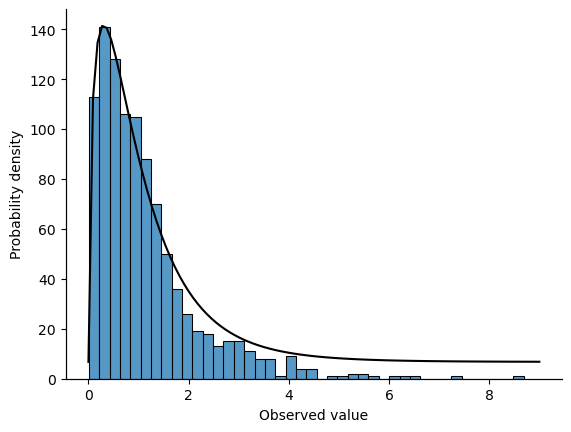

In [28]:
import numpy as np
import seaborn as sns
from scipy import stats

x = np.linspace(0, 9, 100)
y = stats.f.pdf(x, 3,20)

fig = sns.histplot(f_3_20)
ax2 = fig.twinx()

fig.set(xlabel='Observed value', ylabel='Probability density')

sns.lineplot(x=x, y=y, ax=ax2, color='black')

ax2.tick_params(left=False, labelleft=False, top=False, labeltop=False,
                   right=False, labelright=False, bottom=False, labelbottom=False)

sns.despine()

We've seen three new distributions: $\chi^2$, $t$ and $F$. They're all continuous distributions, and they're all closely related to the normal distribution. 

## Summary

We've talked about probability. We've talked what probability means, and why statisticians can't agree on what it means. We talked about the rules that probabilities have to obey. And we introduced the idea of a probability distribution, and spent a good chunk of the chapter talking about some of the more important probability distributions that statisticians work with. The section by section breakdown looks like this:

- [Probability theory versus statistics](probstats)
- Frequentist versus Bayesian [views of probability](probmeaning)
- Basics of [probability theory](basicprobability)
- [Binomial](binomial) distribution, [normal](normal) distribution, and [others](otherdists)

